# EDA ON HABERMAN DATASET 
- Haberman Dataset is collection of of patients who had undergone surgery for breast cancer.
- The data collection is between 1958 and 1970 at the University of Chicago's Billings Hospital.
- Main objective is explore data on what caueses(features) the patinet can survive or die (1 -yes or 2 - die)

In [1]:
''' Importing all required libraries '''
# numpy for computations
import numpy as np 
# pandas - for data anlaysis
import pandas as pd
# seaborn - for data visuvalization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading haberman.csv file into pandas dataFrame
haberman_df = pd.read_csv('haberman.csv')

In [3]:
#colleting the information regarding the data ''' 
''' info()
    1. Projecting there are 305 rows and 4 colomns(30,64,1,1.1)
    2. There are no empty cells in the dataframe
    3. Index column start from 0  and end at 304
'''
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
'''  
describe():
            1. I am able to do box plot
            2. I found their is a outlier in '1' column
            3. More details are represented in below image 
'''
haberman_df.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000



![title](haberman_describe.jpg)


In [5]:
''' I found there is large data imbalance as we see below nearly 25% of 2-values are less 1-values '''
haberman_df['1.1'].value_counts(normalize=True)

1    0.734426
2    0.265574
Name: 1.1, dtype: float64

In [6]:
''' Renaming the columns name 
    - As there is no describition for the csv file in kaggle, naming columns as features -1,2, ....
    - On google search i found cloumns are named as : 
      feature_1 as age,  
      feature_2 as year_of_treatment,  
      feature_3 as positive_lymph_nodes,  
      feature_4 as survival_status_after_5_years
'''
#NOTE: To make difference and more understanding i am using my own names for cloumns (features)

haberman_df = haberman_df.rename(columns={"30": "feature_1", "64": "feature_2","1": "feature_3","1.1":"labels"})
haberman_df

,feature_1,feature_2,feature_3,labels
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [7]:
''' Mapping the labels (target classes)
    - 1- success & 2- failure
'''

haberman_df['labels']= haberman_df['labels'].map({1:'yes', 2:'no'})
haberman_df

,feature_1,feature_2,feature_3,labels
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
...,...,...,...,...
300,75,62,1,yes
301,76,67,0,yes
302,77,65,3,yes
303,78,65,1,no


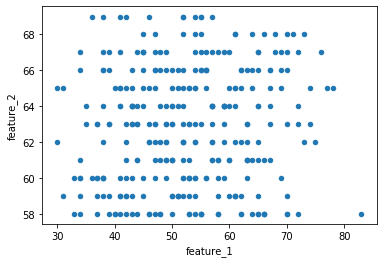

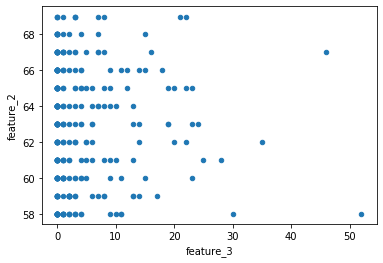

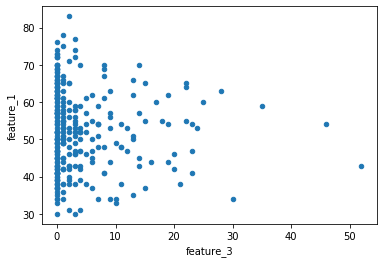

'\n    - min range of the data\n    - max range of data\n    - dense points of data, how to varies from feature to feature\n'

In [8]:
# Univariate Analysis
''' - Its has to see difference between the features, but we can the range and data points lies 
      from feature-1, feature-2&  feature-3'''
haberman_df.plot(kind='scatter', x='feature_1', y='feature_2') ;
plt.show()
haberman_df.plot(kind='scatter', x='feature_3', y='feature_2') ;
plt.show()
haberman_df.plot(kind='scatter', x='feature_3', y='feature_1') ;
plt.show()

#In below plots we can observer:
'''
    - min range of the data
    - max range of data
    - dense points of data, how to varies from feature to feature
'''

/home/trinath/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


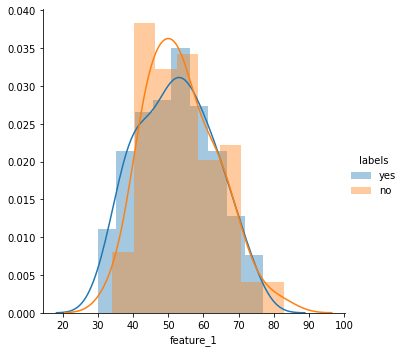

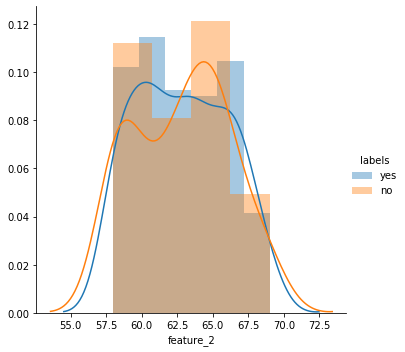

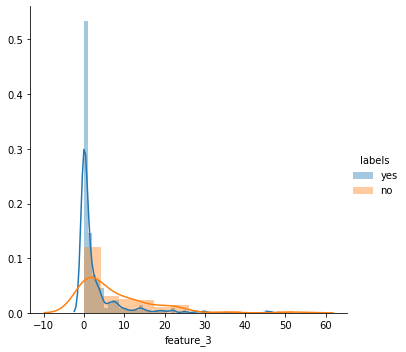

' By observing the below plots:\n    - Histogram indication of data points range on y-axis and features value on x-axies\n    - we can see the smooth curve of histogram which PDF (propability distributuon function) for lables yes and no\n    - Clear indication is there is not clear or approximate differenation of labels of each feature\n    - There is data-imbalance as show in the image above\n    - By removing the outliers and data balancing we can over come\n    - In feature_3 there is large histogram difference projects the indication of outlier\n    - By seeing the PDF in all features we compare labels differance \n'

In [9]:
''' - Adding colour to each feature is done by FacetGrid - distplot'''
#Looping through all features except the lables (target classes)
for feature_indx, feature in enumerate(list(haberman_df.columns)[:-1]):
    haberman_fg = sns.FacetGrid(haberman_df, hue='labels', size=5)
    haberman_fg.map(sns.distplot, feature).add_legend()
    plt.show()
''' By observing the below plots:
    - Histogram indication of data points range on y-axis and features value on x-axies
    - we can see the smooth curve of histogram which PDF (propability distributuon function) for lables yes and no
    - Clear indication is there is not clear or approximate differenation of labels of each feature
    - There is data-imbalance as show in the image above
    - By removing the outliers and data balancing we can over come
    - In feature_3 there is large histogram difference projects the indication of outlier
    - By seeing the PDF in all features we compare labels differance 
'''

[0.88392857 0.07142857 0.02678571 0.01339286 0.         0.00446429]
[0.88392857 0.95535714 0.98214286 0.99553571 0.99553571 1.        ]


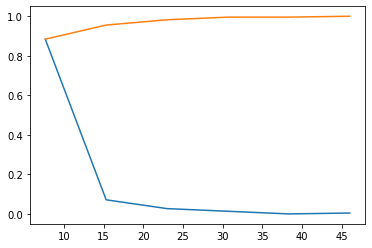

[0.25925926 0.08641975 0.18518519 0.25925926 0.12345679 0.08641975]
[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ]


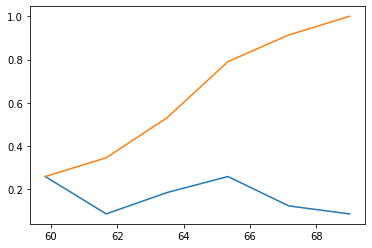

In [10]:
''' Below is CDF - which projects the differentiation of PDF 
    - here i am taking "feature_3" as to visuvalize, because of above plots
    - yes - there is one specific point projecting high (10-15), and other are normalized values (15-45)
    (by removing outiers we can increase chance of wining)
    - for no lables its not like that - but un-uniform values as there, i obser (60-70) more values lies
'''

#here i am using the bin size of 6, if reauired can based on  range we want to focus
cdf_lables_yes = haberman_df.loc[haberman_df["labels"] == "yes"];
cdf_labels_no = haberman_df.loc[haberman_df["labels"] == "no"];
counts, bin_edges = np.histogram(cdf_lables_yes['feature_3'], bins=6,density = True)

# yes labels
'''the pdf line which starts with high value in range (5-15) and normal from range(15-50)'''
haberman_pdf = counts/(sum(counts))
haberman_cdf = np.cumsum(haberman_pdf)
print(haberman_pdf);
print(haberman_cdf)
plt.plot(bin_edges[1:],haberman_pdf)
plt.plot(bin_edges[1:], haberman_cdf)
plt.show();

# no labels
''' the pdf line diffreent from yes lables, which has more ups and downs as showed in the below plot'''
counts, bin_edges = np.histogram(cdf_labels_no['feature_2'], bins=6, density = True)
haberman_pdf = counts/(sum(counts))
print(haberman_pdf);
print(bin_edges)
haberman_cdf = np.cumsum(haberman_pdf)
plt.plot(bin_edges[1:],haberman_pdf)
plt.plot(bin_edges[1:], haberman_cdf)

plt.show();

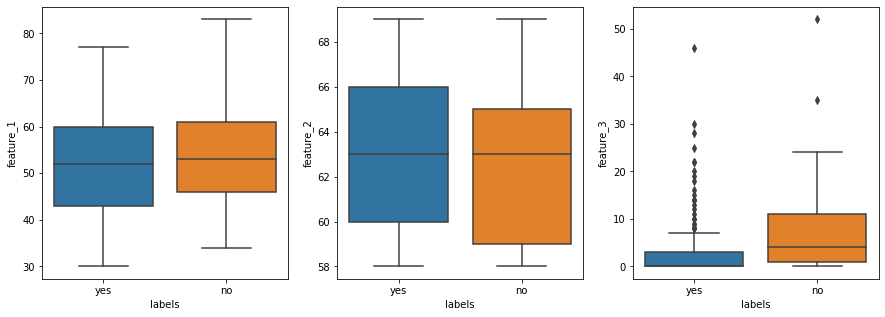

' - very clear projection of labels range for each feature in a single shot\n    - As feature_1 and feature_2 more than 50% lables(1 & 2) lies in smae range where as for the  feature_3 (2 lables are higher) we can see major difference.\n'

In [11]:
''' 3d -scatter plots '''
# sns.boxplot(x='labels',y='feature_1', data=haberman_df)
# plt.show()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    sns.boxplot( x='labels', y=feature, data=haberman_df, ax=axes[idx])
plt.show() 

''' - very clear projection of labels range for each feature in a single shot
    - As feature_1 and feature_2 more than 50% lables(1 & 2) lies in smae range where as for the  feature_3 (2 lables are higher) we can see major difference.
'''

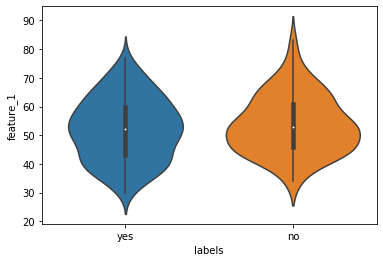

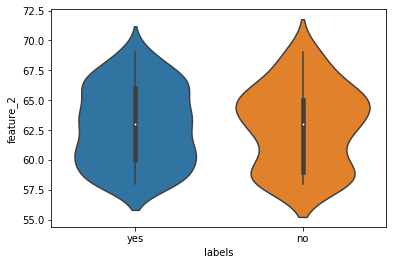

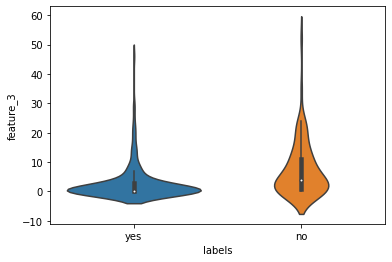

' .\n    1. In feature_2 58.5 to 62 if we observe carefully yes label have more wide and no lable has less wide\n    2. From feature_3 also we observe the yes labels wide range than no lables range at the start.\n'

In [12]:
''' The combination of box and smooth histogram clear plots are represnted below in the form of violin plots'''
sns.violinplot(x='labels',y='feature_1', data=haberman_df)
plt.show()
sns.violinplot(x='labels',y='feature_2', data=haberman_df)
plt.show()
sns.violinplot(x='labels',y='feature_3', data=haberman_df)
plt.show()

''' .
    1. In feature_2 58.5 to 62 if we observe carefully yes label have more wide and no lable has less wide
    2. From feature_3 also we observe the yes labels wide range than no lables range at the start.
'''

/home/trinath/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


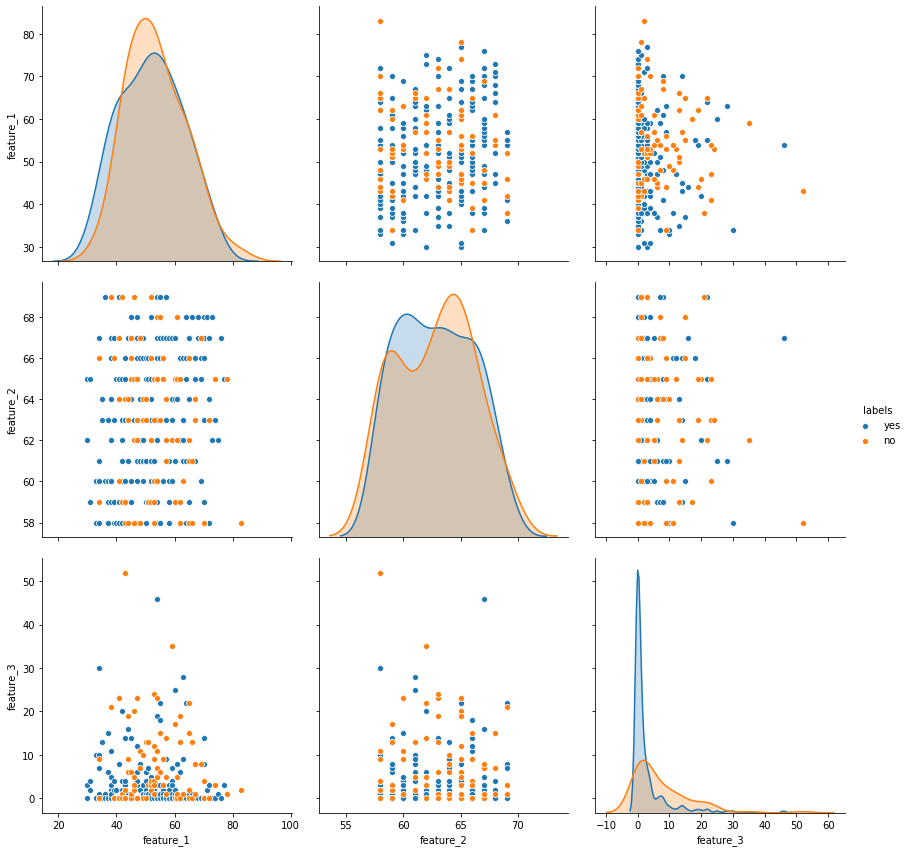

' \n    - feature_1 has range from 30 to 82 where as median as 52 \n    - And most of my feautures are clearly represneted as shown in the image\n'

In [13]:
# pair plot
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""
sns.pairplot(haberman_df, hue='labels', size=4)
plt.show()
''' 
    - feature_1 has range from 30 to 82 where as median as 52 
    - And most of my feautures are clearly represneted as shown in the image
'''

'''
    - Apart from iris dataset haberman can not class on single feature (To obtain more win chances).
    - feature_2 and features_3 projected more inofrmation for classifing lables(yes | no) rather than feature_1
    - I am able to plot my own projection using the in-built functions as info,describe
    - As shown in the image if we do more data-balance and removing of outliers if helps in more predicting the lables with higher accuracy
'''


![title](haberman_describe.jpg)
